In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly_resampler import FigureResampler, FigureWidgetResampler

In [8]:
data_path = "../data/afrr_price.parquet"
train_start = "2024-11-24 22:00:00"
test_start = "2025-01-20 22:00:00"
test_end = "2025-03-20 22:00:00"
target_col = "aFRR_DownCapPriceEUR"

In [ ]:
data = pd.read_parquet(data_path)
ts = data['aFRR_DownCapPriceEUR']
ts = ts[ts.index>= test_start]


def generate_forecasts_every_24_steps(prices, window_size=10):
    result_df = pd.DataFrame({'original_price': prices})
    
    result_df['moving_avg'] = result_df['original_price'].rolling(window=window_size).mean()
    
    result_df['forecast_24_ahead'] = np.nan
    
    for i in range(window_size, len(prices) - 24):
        current_ma = result_df['moving_avg'].iloc[i]
        result_df['forecast_24_ahead'].iloc[i + 24] = current_ma
    
    return result_df

In [10]:
ts_hat = generate_forecasts_every_24_steps(ts, window_size=10)

/tmp/ipykernel_2444/3551892644.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result_df['forecast_24_ahead'].iloc[i + 24] = current_ma
/tmp/ipykernel_2444/3551892644.py:17: FutureWarning: ChainedAssignmentError: behaviour will change i

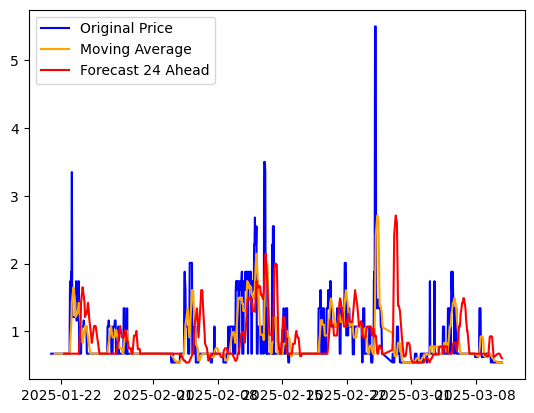

In [11]:
plt.plot(ts.index, ts, label='Original Price', color='blue')
plt.plot(ts_hat.index, ts_hat['moving_avg'], label='Moving Average', color='orange')
plt.plot(ts_hat.index, ts_hat['forecast_24_ahead'], label='Forecast 24 Ahead', color='red')
plt.legend()
plt.show()